In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-notebook')
plt.rcParams['figure.dpi'] = 100

# Данные с информацией о аниме

In [3]:
anime = pd.read_csv('/media/vaserkn/HDD/Anime_rec_sys/anime.csv')

In [66]:
anime.shape

(17562, 35)

In [55]:
anime.sample()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
9426,25999.0,Minna Atsumare! Falcom Gakuen SC,6.03,"Parody, Comedy, School, Seinen",NaN,みんな集まれ！ファルコム学園ＳＣ,TV,12,"Jan 4, 2015 to Mar 22, 2015",Winter 2015,...,55.0,37.0,73.0,153.0,198.0,139.0,58.0,43.0,27.0,20.0


In [7]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [8]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

# Кол-во пропущенных значений

In [19]:
for col in anime.columns:
        anime.loc[anime[col] == 'Unknown', col] = np.nan
        if anime[col].isnull().sum() > 0:
                print('{}, {}'.format(col, anime[col].isnull().sum()))

Score, 5141
Genres, 63
English name, 10565
Japanese name, 48
Type, 37
Episodes, 516
Aired, 309
Premiered, 12817
Producers, 7794
Licensors, 13616
Studios, 7079
Source, 3567
Duration, 555
Rating, 688
Ranked, 1762
Score-10, 437
Score-9, 3167
Score-8, 1371
Score-7, 503
Score-6, 511
Score-5, 584
Score-4, 977
Score-3, 1307
Score-2, 1597
Score-1, 459


## Кол-во аниме по жанрам

<Axes: xlabel='Type'>

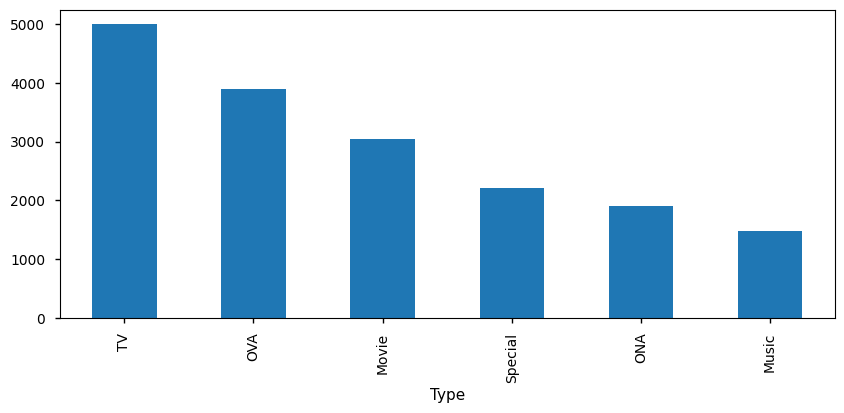

In [45]:
anime['Type'].value_counts().plot(kind='bar', figsize=(10, 4))

## Топ 10 аниме по размеру сообщества

In [13]:
top10 = anime[['Name', 'Members']].sort_values(by='Members', ascending=False).iloc[:10]
top10.index = top10['Name']
top10.drop(columns=['Name'])

<Axes: xlabel='Name'>

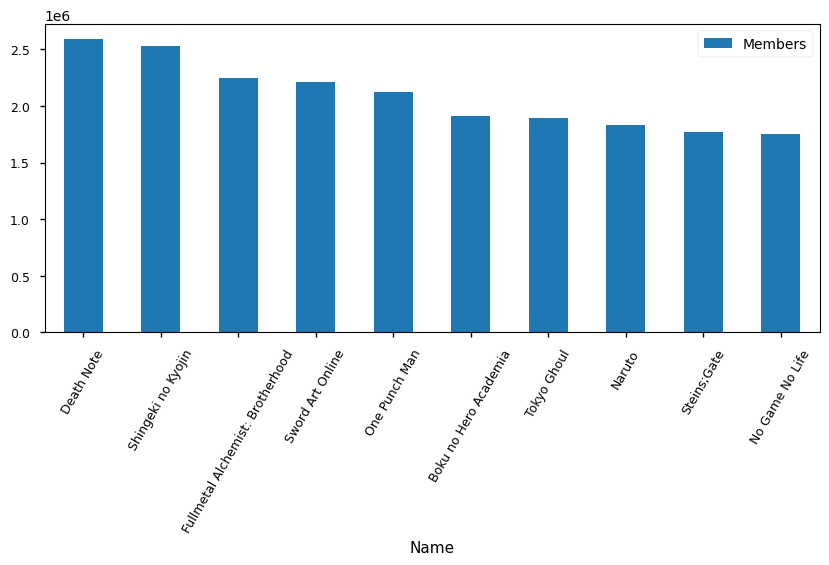

In [44]:
top10.plot(kind='bar', figsize=(10, 4), rot=60, fontsize=9)

## Кол-во аниме по возрастным ограничениям

<Axes: xlabel='Rating'>

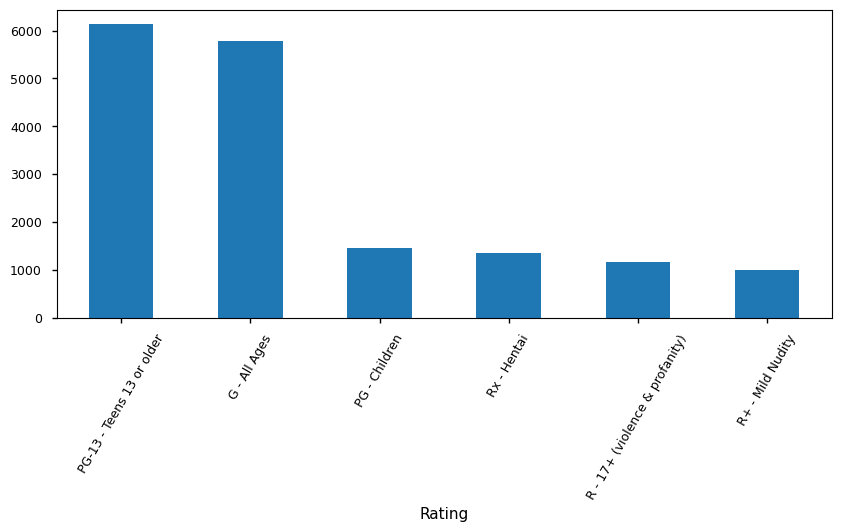

In [60]:
anime['Rating'].value_counts().plot(kind='bar', figsize=(10, 4), rot=60, fontsize=9)

# Данные с информацией о рейтингах пользователей

In [21]:
ratings = pd.read_csv('/media/vaserkn/HDD/Anime_rec_sys/rating_complete.csv')

In [67]:
ratings.shape

(57633278, 3)

In [65]:
ratings.sample()

,user_id,anime_id,rating
187725,1177,4596,8


In [72]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


## Кол-во поставленных рейтингов

<Axes: xlabel='rating'>

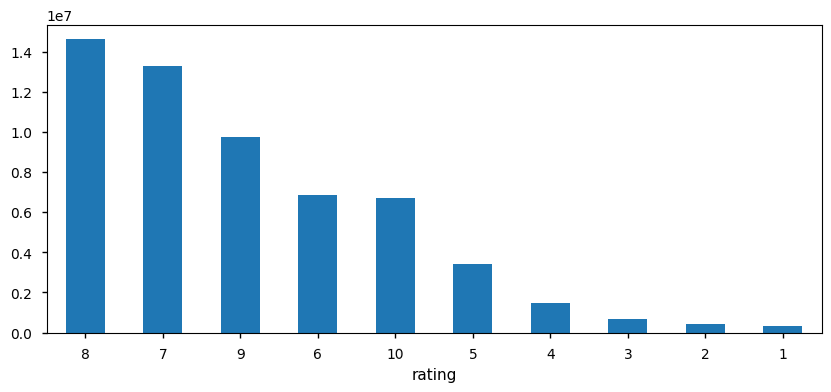

In [71]:
ratings['rating'].value_counts().plot(kind='bar', figsize=(10, 4), rot=True)